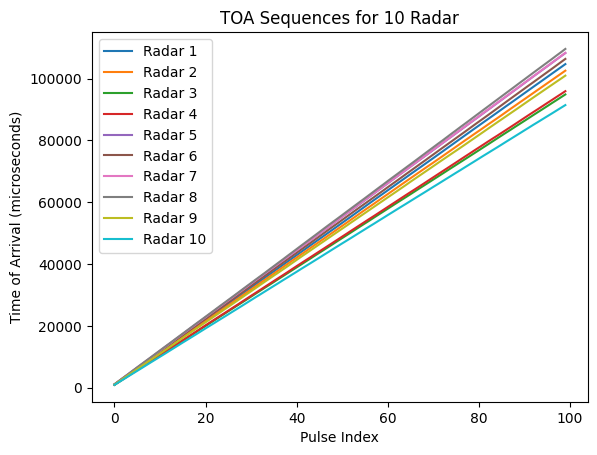

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_Radar = 10
num_pulses = 100
base_pri = 1000  # Base PRI in microseconds

# Generate TOA sequences with distinct PRIs for each emitter
toa_sequences = []#intialize empty to store toa
pris = []# same to store pris

for i in range(num_Radar):
    pri = base_pri + np.random.randint(-100, 100)  # Larger variation in PRI #unique pri for each radar
    pris.append(pri)
    toa_sequence = np.cumsum(np.ones(num_pulses) * pri + np.random.normal(0, 10, num_pulses))  # Add some noise
    toa_sequences.append(toa_sequence)

# Plot TOA sequences
for i, toa_sequence in enumerate(toa_sequences):
    plt.plot(toa_sequence, label=f'Radar {i+1}')
plt.xlabel('Pulse Index')
plt.ylabel('Time of Arrival (microseconds)')
plt.title('TOA Sequences for 10 Radar')
plt.legend()
plt.show()

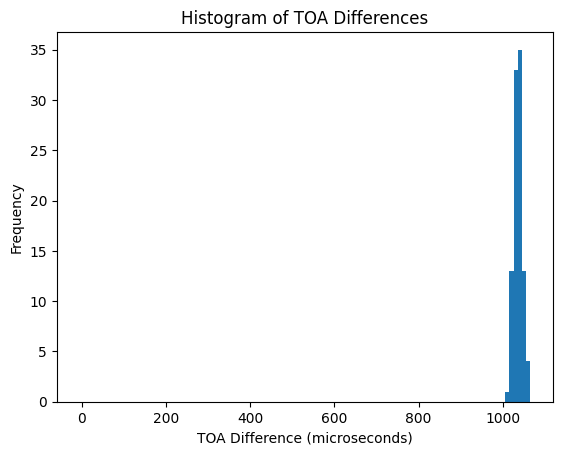

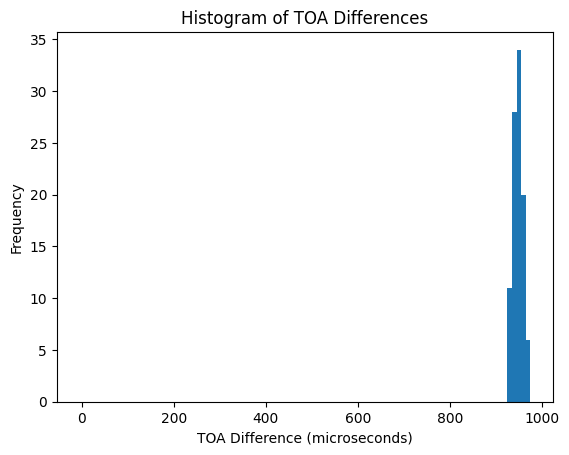

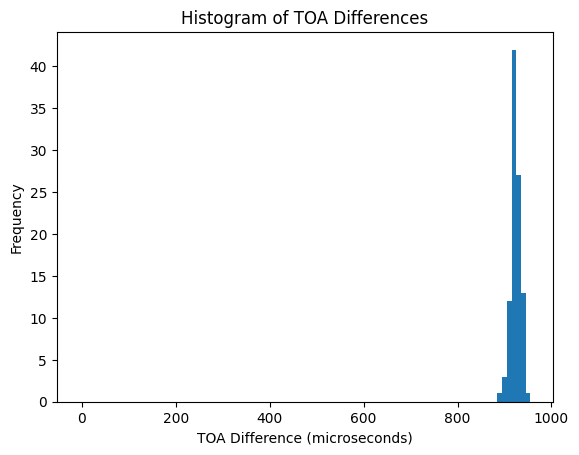

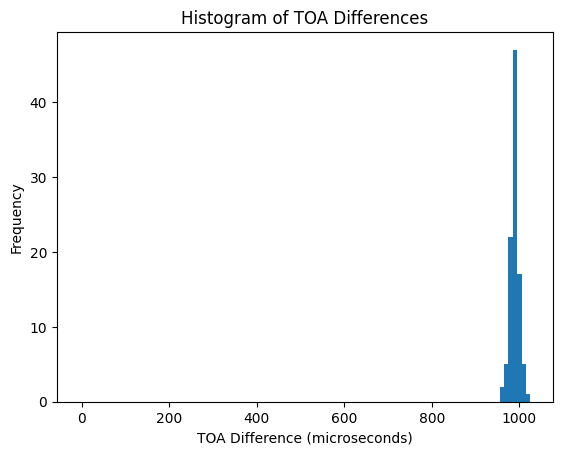

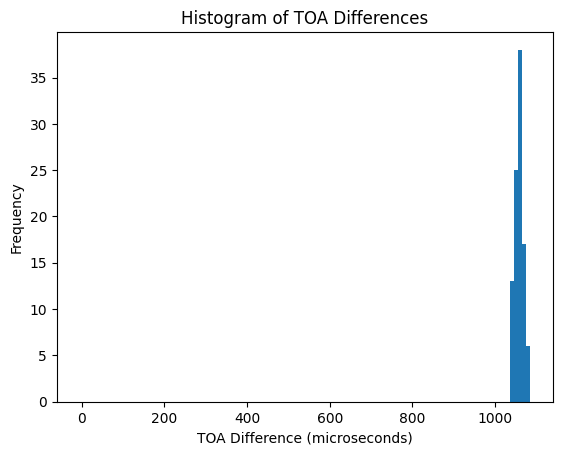

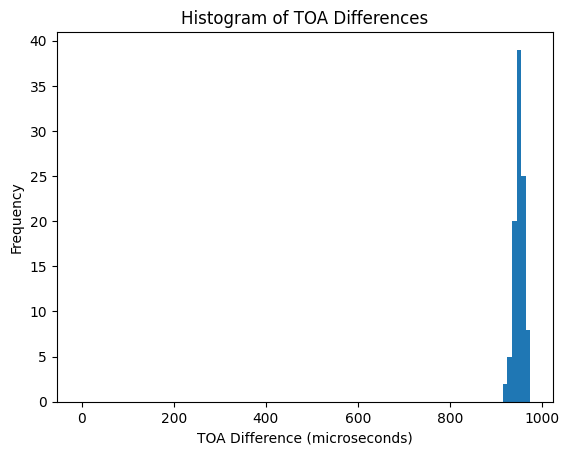

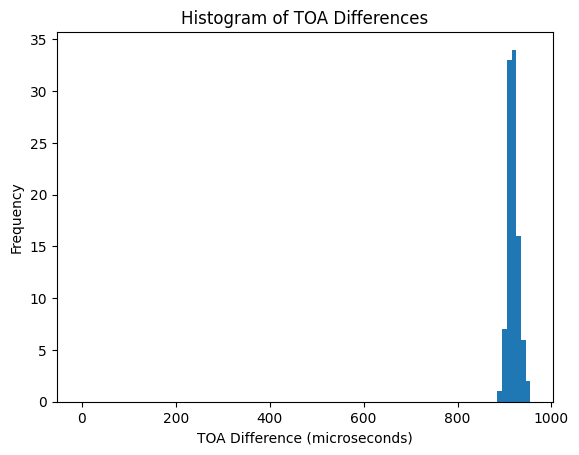

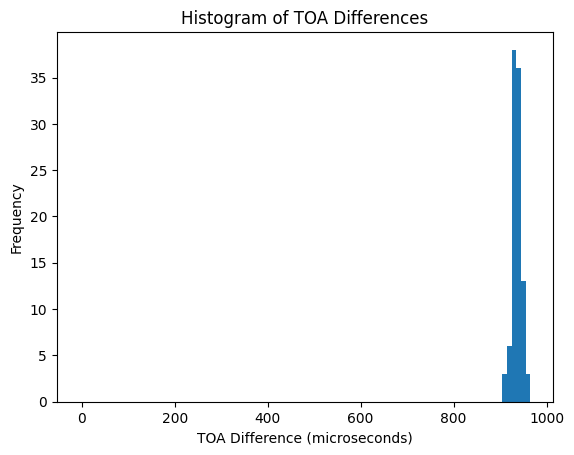

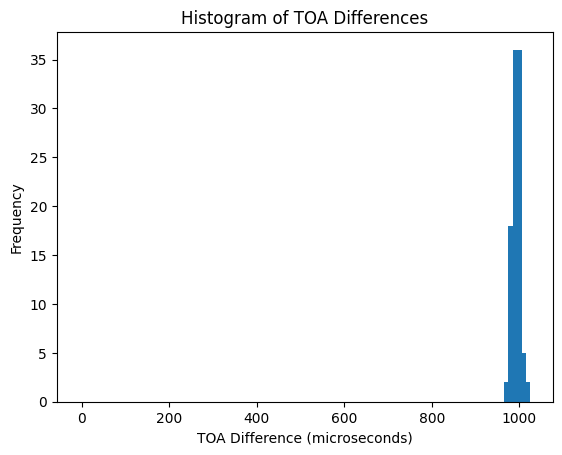

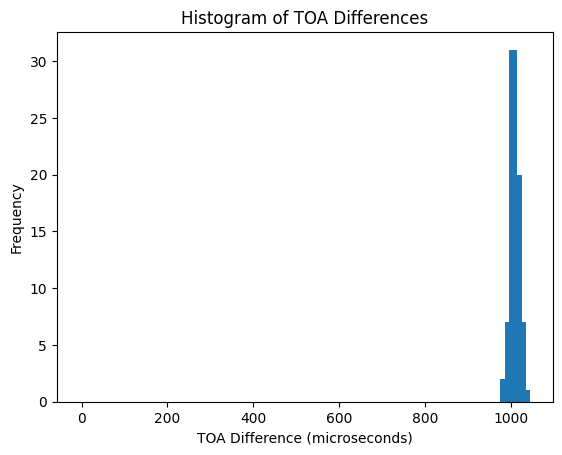

Radar 1: Extracted PRIs = [1020. 1030. 1040. 1050.]
Radar 2: Extracted PRIs = [930. 940. 950. 960. 970.]
Radar 3: Extracted PRIs = [910. 920. 930. 940.]
Radar 4: Extracted PRIs = [ 980.  990. 1000.]
Radar 5: Extracted PRIs = [1040. 1050. 1060. 1070. 1080.]
Radar 6: Extracted PRIs = [940. 950. 960. 970.]
Radar 7: Extracted PRIs = [900. 910. 920. 930. 940.]
Radar 8: Extracted PRIs = [920. 930. 940. 950.]
Radar 9: Extracted PRIs = [ 980.  990. 1000.]
Radar 10: Extracted PRIs = [ 990. 1000. 1010. 1020. 1030.]


In [ ]:
# Calculate differences between successive TOAs for each emitter
def calculate_differences(toa_sequence):
    return np.diff(toa_sequence)

# Create a histogram of TOA differences
def create_histogram(differences, binsize=1):
    bins = np.arange(0, max(differences) + binsize, binsize)
    hist, bin_edges = np.histogram(differences, bins=bins)
    return hist, bin_edges

# Extract potential PRIs from the histogram
def extract_pris(hist, bin_edges, threshold):
    potential_pris = bin_edges[:-1][hist > threshold]
    return potential_pris

# Adjust the threshold value
threshold = 5  # Lower the threshold for this example
extracted_pris = []

for toa_sequence in toa_sequences:
    differences = calculate_differences(toa_sequence)
    hist, bin_edges = create_histogram(differences, binsize=10)
    potential_pris = extract_pris(hist, bin_edges, threshold)
    extracted_pris.append(potential_pris)

    # Plot the histogram for visual inspection
    plt.bar(bin_edges[:-1], hist, width=10)
    plt.xlabel('TOA Difference (microseconds)')
    plt.ylabel('Frequency')
    plt.title('Histogram of TOA Differences')
    plt.show()o

# Display extracted PRIs
for i, pri in enumerate(extracted_pris):
    print(f'Radar {i+1}: Extracted PRIs = {pri}')


In [ ]:
from sklearn.cluster import KMeans

# Prepare features for clustering
features = [] # initialize an empty lsit to store the feature vectors
for pri in extracted_pris:  # iterates each pri on extracted_pris
    if len(pri) > 0: # check if  the [rilist is not empty
        features.append(pri) # if pri is not empty it appends pri to the feature
    else:
        features.append([0])  # Handle empty PRIs case  # if pti is empty it appends {0} to feature

# Convert to numpy array and ensure all sublists have the same length
max_length = max(len(f) for f in features)
features = np.array([np.pad(f, (0, max_length - len(f)), 'constant') for f in features])

# Perform K-means clustering
num_clusters = 10  # Number of radar
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(features)

# Display clustering results
for i, label in enumerate(labels):
    print(f'Radar {i+1}: Cluster {label}')



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Radar 1: Cluster 4
Radar 2: Cluster 6
Radar 3: Cluster 1
Radar 4: Cluster 2
Radar 5: Cluster 3
Radar 6: Cluster 7
Radar 7: Cluster 0
Radar 8: Cluster 8
Radar 9: Cluster 2
Radar 10: Cluster 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
